### Пример применения метода Якоби для решения уравнения Ax=b, где А матрица 3х3 с диагональным преобладанием .

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', **{'size' : 22})

In [3]:
def jacobi_method(A , b , steplength):
    result = []
    x = np.array([1.0,1.0,1.0])
    #Обращение диагональной части матрицы А
    d = np.diag(A).astype(np.float32)
    for i in range(len(d)) :
        if d[i] != 0 :
            d[i] = 1.0/d[i]
    D = np.diag(d) 
    
    count = 0
    
    while(1):
        result.append(x)
        tmp = x
        x = x + D@(b - A@x)
        if( float((tmp-x)@(tmp-x)) < steplength):
            break 
        count = count + 1
    return result
    

Число шагов : 7
Значение Ar = [7121.9999956  2229.99999932 3329.99999186]
Найденное r = (x,y,z): 21.768765207222664 2.742824277800969 3.0005147607713614


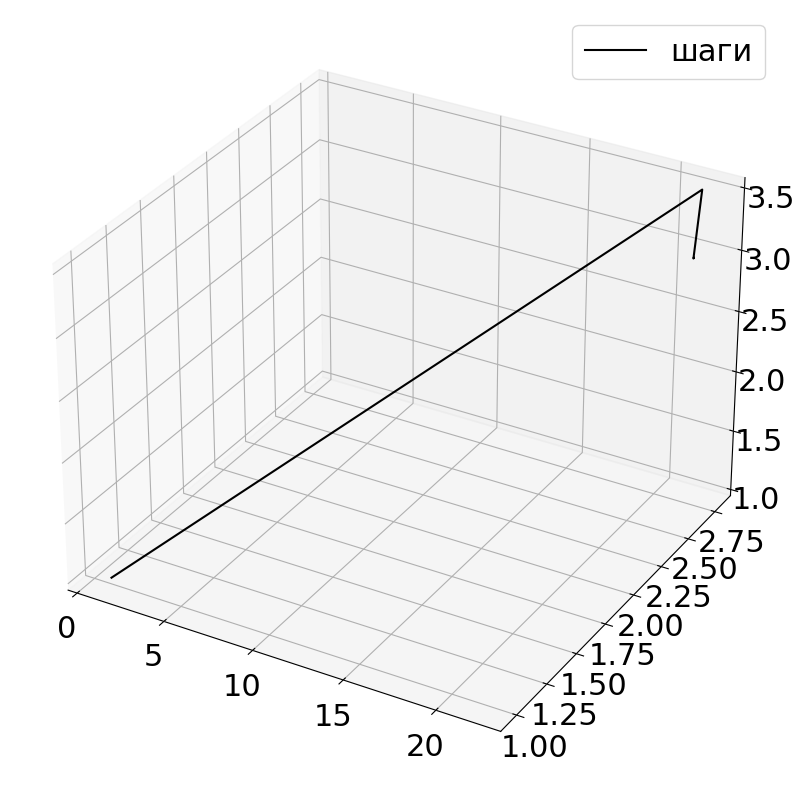

In [4]:

A = np.array(
    [[324,12,12],
    [1 ,804 , 1],
    [12,131,903]]
)
b = np.array([7122.0,2230.0,3330.0])
steplength = 10e-15

res = jacobi_method(A,b,steplength)
x =[]; y = [] ;z = []
for i in range(len(res)):
    x.append(res[i][0]) ; y.append(res[i][1]) ;z.append(res[i][2]) 

print("Число шагов :",len(x))
print("Значение Ar =",A@[x[len(x)-1],y[len(y)-1] , z[len(z)-1]])
print("Найденное r = (x,y,z):" ,x[len(x)-1],y[len(y)-1] , z[len(z)-1])

ax = plt.figure(figsize=(18, 10)).add_subplot(projection='3d')
ax.plot(x , y , z, 'k-', ms=16, label='шаги')
plt.legend()
plt.show()

# Решим уравнение теплопроводности методом Якоби :

In [5]:
def psi(x):
    return np.sin(2*x*np.pi)/(4*np.pi**2)+10*x+10

def search_max_lambda(A):
    a = np.ones(len(A))
    count = 0
    while(count < 50):
        tmp = A@a
        l = ( tmp@a ) / (a@a)
        a =tmp/np.sqrt(tmp@tmp)
        count = count + 1
    return l 

In [6]:


def D_1(A) :
    d = np.diag(A).astype(np.float32)
    for i in range(len(d)) :
        if d[i] != 0 :
            d[i] = 1.0/d[i]
    return np.diag(d).astype(np.float32)

def Jacobi_method(array,h,step,count,key) :
    a = np.ones(len(array)-2).astype(np.float32)
    A = np.zeros((len(array)-2 ,len(array)-2)).astype(np.float32)
    for i in range(len(A)):
        for j in range(len(A[0])):
            if i == j :
                A[i][j] = 2
            if abs(i - j) == 1 :
                A[i][j] = -1 
    b = []
    for i in range(1,len(array)-1):
        b.append(np.sin(2*array[i]*np.pi)*(h*h))
    b =np.array(b).astype(np.float32)
    b[0] = b[0] + 10.0
    b[len(b)-1] = b[len(b)-1] + 20.0
    D = D_1(A)
    cnt = 0 
    while(cnt < count):
        tmp = a
        a = tmp + D@(b - A@tmp)
        cnt = cnt + 1
        if (tmp-a)@(tmp-a) < step and key :
            print(cnt)
            break
    return (array[1:-1] , a)  

def solve_reverse(array,h) :
    A = np.zeros((len(array)-2 ,len(array)-2)).astype(np.float32)
    for i in range(len(A)):
        for j in range(len(A[0])):
            if i == j :
                A[i][j] = 2
            if abs(i - j) == 1 :
                A[i][j] = -1 
    b = []
    for i in range(1,len(array)-1):
        b.append(np.sin(2*array[i]*np.pi)*(h*h))
    b =np.array(b).astype(np.float32)
    b[0] = b[0] + 10.0
    b[len(b)-1] = b[len(b)-1] + 20.0
    A = np.linalg.inv(A)
    return A@b
    

    

In [1]:
h = 0.1
h_array = np.arange(0.,1.0,h)

count = 200
step = 0.0001
(x,y) = Jacobi_method(h_array ,h ,step , count , False)
result = solve_reverse(h_array,h)
# array_solve = psi(h_array)

plt.figure(figsize=(18, 10))
# plt.plot(x,y , 'k--', ms=16, label='Наше вычисление решение')
# plt.plot(h_array,array_solve , 'k-', ms=16, label='Настоящее решение')
plt.plot(h_array[1:-1],abs(y-result) , 'k-', ms=16, label='Ошибка')

plt.legend()
plt.show()

NameError: name 'np' is not defined

На сетке из 100 точек : \
На 1000 шагов имеем максимальную ошибку : 10 \
На 2000 шагов имеем максимальную ошибку : 6.5 \
На 3000 шагов имеем максимальную ошибку : 4   \
На 4000 шагов имеем максимальную ошибку : 3 \
На 5000 шагов имеем максимальную ошибку : 1.5\
На 6000 шагов имеем максимальную ошибку : 0.9\
На 

In [21]:
#Скорость сходимости : e_0*q^6000 /e_0*q^1000 =0.09
# На сетке из 100 точек :
q = np.power(0.09 , 0.0002)
print("Сходится очень медленно , так что оценка не хорошая",q) 

0.9995185268236972


Теперь  сравним экспериментально сходимость и сходимость теоретическую на сетке из 10 точек  : \
На 100 шагов имеем максимальную ошибку :0.035\
На 150 шагов имеем максимальную ошибку :0.0016\
На 170 шагов имеем максимальную ошибку :0.00045\
На 180 шагов имеем максимальную ошибку :0.00024\
На 200 шагов имеем максимальную ошибку : $7*10^-5$\
На 300 шагов имеем максимальную ошибку : $7*10^-6$

In [51]:
#Скорость сходимости : e_0*q^300 /e_0*q^100 = 7*10^-5/0.035
# На сетке из 100 точек :
d = 7.0*10**-5/0.035
q = np.power(d , 1.0/100)
print("Экспериментальная сходимость : ",q)

Экспериментальная сходимость :  0.9397455978018326


Спектральные радиусы матриц:

In [52]:
A = np.zeros((len(h_array)-2 ,len(h_array)-2)).astype(np.float32)
E = np.diag( np.ones(len(h_array)-2) )
for i in range(len(A)):
    for j in range(len(A[0])):
        if i == j :
            A[i][j] = 2
        if abs(i - j) == 1 :
            A[i][j] = -1 
q_max = search_max_lambda(A)
print("lambda_abs_max(A) = ",q_max)
q_spectr = search_max_lambda(E - D_1(A)@A)
print("lambda_abs_max(E - D^-1A) = " ,q_spectr)
A = A -q_max*E
delta_q =search_max_lambda(A)
print("q_min-q_max = ",delta_q)
q_min = q_max + delta_q
print("q_min = " ,q_min)

print("Сходимость теоретическая :" , q_spectr)


lambda_abs_max(A) =  3.5320888862379567
lambda_abs_max(E - D^-1A) =  0.9396926207717516
q_min-q_max =  -3.411474127809756
q_min =  0.12061475842820091
Сходимость теоретическая : 0.9396926207717516


Теоретическая скорость сходимости : 0.9396926207717516 \
Экспериментальная скорость сходимости : 0.9397455978018326 \